In [1]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import scipy.special as sp
np.random.seed(42)

In [2]:
def adfibo(alpha, n, x):
    s = 0*x
    for i in range(int(np.ceil(alpha)),n+1):
        if (i+n)%2==0:
            s=s+0
        else:
            s=s+(sp.factorial((n+i-1)/2))/(sp.factorial(i-alpha)*sp.factorial((n-i-1)/2))*x**(i-alpha)
    return s

def Input(x,degree,alpha):
    inp_x = []
    for i in range(1,degree+1):
        inp_x.append(adfibo(alpha,i,x))
    return np.array([inp_x])

def Neural_Network(input,degree,alpha,weights):
    z=[]
    z.append(Input(input, degree, alpha))
    z.append(np.dot(z[0],weights.T))
    return z[1], z[0]

def function(t, alpha):
    return t**2+(2*t**(2-alpha))/sp.factorial(2-alpha)

In [3]:
def prob(input,degree,weights, alpha):
    tri_w = np.zeros_like(weights)
    h = np.zeros((len(weights[0]),len(weights[0])))
    error1  = 0
    error2  = 0
    z_int, dw_int = Neural_Network(0,degree,0,weights)
    for l in input:
        z, dw = Neural_Network(l,degree,0,weights)
        z_alp, dw_alp = Neural_Network(l,degree,alpha,weights)
        
        tri_w =tri_w +2*(z_alp+z-function(l, alpha))*(dw_alp+dw)
        
        for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                     
                     h[i,j]=h[i,j]+2*(dw_alp[0,i]+dw[0,i])*(dw_alp[0,j]+dw[0,j])
    
        error1=error1+(z_alp+z-function(l, alpha))**2
        error2=error2+(z_alp+z-function(l, alpha))**2
        
    tri_w = tri_w/(2*len(input)) + z_int*dw_int   #2/2
    for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                      h[i,j]=h[i,j]/(2*len(input))+ dw_int[0,i]*dw_int[0,j]   #2/2
                     
    error1=error1/(2*len(input)) +1/2*z_int**2
        
    return error1, error2/(2*len(input)),tri_w,h


def feed_farward(input,alpha, degree,accuracy,iter):
    w = r.random_sample((1,degree))
    k=0
    lem = 10**4
    while k<iter:
        error1,error2, tri_w, h,  = prob(input,degree,w, alpha)
        
        if error1<accuracy:
            break
        else:
            w_next = w.T - np.dot(np.linalg.inv(h+lem*np.identity(len(h))),tri_w.T)
            error11,error22,_,_ = prob(input,degree,w_next.T, alpha)
            
            if error11<error1:
                w = w_next.T
                k= k+1
                lem = lem/4
                print(f"Number of iteration is {k} and error is {error11}") 
            else:
                lem = 2*lem
                print(f"lemda is increasing {lem}")
                if lem>10**(20):
                    print("Lemda is too large, stopping the process")
                    break
            
    return w, error11, error22
       

In [4]:
def Nsol(Input,degree, weights):
    z1, z2 = Neural_Network(Input,degree,0,weights)
    return z1[0,0]

def Exsol(t):
    return t**2

def get_error():
    #input_train = np.linspace(0,1,11)
    input_train = np.random.uniform(0, 1, 10)
    degree = 3
    alpha = [0.25, 0.5, 0.75, 1]
    absolute_errors = []
    relative_errors = []
    input_error = np.linspace(0,1,101)
    for a in alpha:
        w , error1, error2 = feed_farward(input_train,a,degree,10**(-31),500)
        abs_error_temp = []
        rel_error_temp = []
        for i in input_error:
            temp = abs(Nsol(i,degree,w)-Exsol(i))
            abs_error_temp.append(temp)
            rel_error_temp.append(temp / Exsol(i) if Exsol(i) != 0 else 0)
        absolute_errors.append(abs_error_temp)
        relative_errors.append(rel_error_temp)

    return absolute_errors, relative_errors
absolute_error, relavtive_error = get_error()

Number of iteration is 1 and error is [[2.16092436]]
Number of iteration is 2 and error is [[2.1474872]]
Number of iteration is 3 and error is [[2.09481958]]
Number of iteration is 4 and error is [[1.90028093]]
Number of iteration is 5 and error is [[1.32144896]]
Number of iteration is 6 and error is [[0.41636436]]
Number of iteration is 7 and error is [[0.03810993]]
Number of iteration is 8 and error is [[0.01461858]]
Number of iteration is 9 and error is [[0.01109123]]
Number of iteration is 10 and error is [[0.0045036]]
Number of iteration is 11 and error is [[0.00041939]]
Number of iteration is 12 and error is [[4.1048779e-06]]
Number of iteration is 13 and error is [[2.92973931e-09]]
Number of iteration is 14 and error is [[1.36087452e-13]]
Number of iteration is 15 and error is [[3.99152139e-19]]
Number of iteration is 16 and error is [[7.33863927e-26]]
Number of iteration is 17 and error is [[2.32074558e-32]]
Number of iteration is 1 and error is [[0.23123788]]
Number of iterati

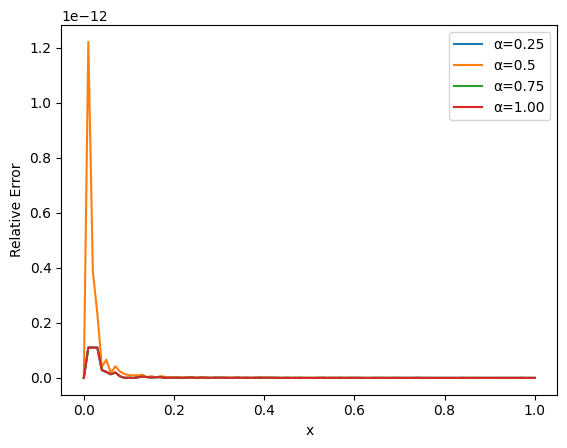

In [5]:
input = np.linspace(0,1,101)

plt.plot(input, relavtive_error[0],label="\u03B1=0.25")
plt.plot(input, relavtive_error[1], label="\u03B1=0.5")
plt.plot(input, relavtive_error[2], label ="\u03B1=0.75")
plt.plot(input, relavtive_error[3], label ="\u03B1=1.00")
plt.xlabel("x")
plt.ylabel("Relative Error")
plt.legend()    
plt.savefig('line_plot1.png')


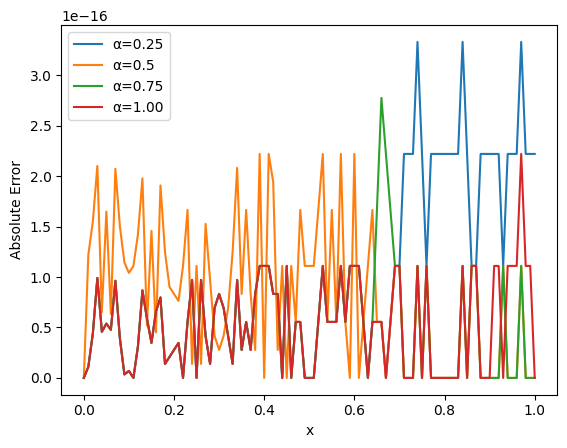

In [6]:

plt.plot(input, absolute_error[0],label="\u03B1=0.25")
plt.plot(input, absolute_error[1], label="\u03B1=0.5")
plt.plot(input, absolute_error[2], label ="\u03B1=0.75")
plt.plot(input, absolute_error[3], label ="\u03B1=1.00")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.legend()    
plt.savefig('line_plot.png')

In [7]:
alpha = [0.25, 0.5, 0.75, 1]
absolute_error = np.array(absolute_error)
for i in range(4):
    print("For =", alpha[i], "is", np.array([absolute_error[i,j] for j in range(0,101,10)])) 
    print(" ")

For = 0.25 is [0.00000000e+00 6.93889390e-18 2.77555756e-17 8.32667268e-17
 1.11022302e-16 0.00000000e+00 1.11022302e-16 1.11022302e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16]
 
For = 0.5 is [0.00000000e+00 1.04083409e-16 8.32667268e-17 2.77555756e-17
 0.00000000e+00 1.11022302e-16 2.22044605e-16 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 
For = 0.75 is [0.00000000e+00 6.93889390e-18 2.77555756e-17 8.32667268e-17
 1.11022302e-16 0.00000000e+00 1.11022302e-16 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 
For = 1 is [0.00000000e+00 6.93889390e-18 2.77555756e-17 8.32667268e-17
 1.11022302e-16 0.00000000e+00 1.11022302e-16 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 
